#### Import packages

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D

#### Import Pezzulo trials

In [2]:
current_dir = os.getcwd()

# Path to where the csv file is relative to the current script's directory
path_to_csv = os.path.abspath(os.path.join(current_dir, 
                                           '../../../data_analysis/decision_making_models/hssm/parameter_recovery'))

# Construct the full paths to the CSV files within the folder
gambles_files = f'{path_to_csv}/pezzulo_gambles.csv'

gambles= pd.read_csv(gambles_files)

n_rounds = len(gambles)

# Print the updated DataFrame to verify
print(gambles.head())  # Show first few rows, including the new column



   lot_0_prob  lot_0_val  lot_1_prob  lot_1_val  lot_0_ev  lot_1_ev  Deadline
0          90         20          30         60     18.00     18.00        10
1          85         20          31         55     17.00     17.05        10
2          80         20          29         55     16.00     15.95         8
3          90         25          35         65     22.50     22.75        12
4          85         25          35         60     21.25     21.00        10


In [3]:
#gambles.to_csv(gambles_files, index=False)

In [4]:
d_x = np.zeros(n_rounds)
d_p = np.zeros(n_rounds)
d_ev = np.zeros(n_rounds)
modulus = np.zeros(n_rounds)
abs_sum_d = np.zeros(n_rounds)

for i in range(n_rounds):
    lot_0_prob = gambles.iloc[i]['lot_0_prob']
    lot_0_val = gambles.iloc[i]['lot_0_val']
    lot_0_ev = gambles.iloc[i]['lot_0_ev']
    
    lot_1_prob = gambles.iloc[i]['lot_1_prob']
    lot_1_val = gambles.iloc[i]['lot_1_val']
    lot_1_ev = gambles.iloc[i]['lot_1_ev']
    
    d_x[i] = lot_0_val - lot_1_val
    d_p[i] = lot_0_prob - lot_1_prob
    d_ev[i] = lot_0_ev - lot_1_ev
    modulus[i] = np.sqrt(d_x[i]**2 + d_p[i]**2 + d_ev[i]**2)
    abs_sum_d[i] = abs(d_x[i] + d_p[i] + d_ev[i])
    

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


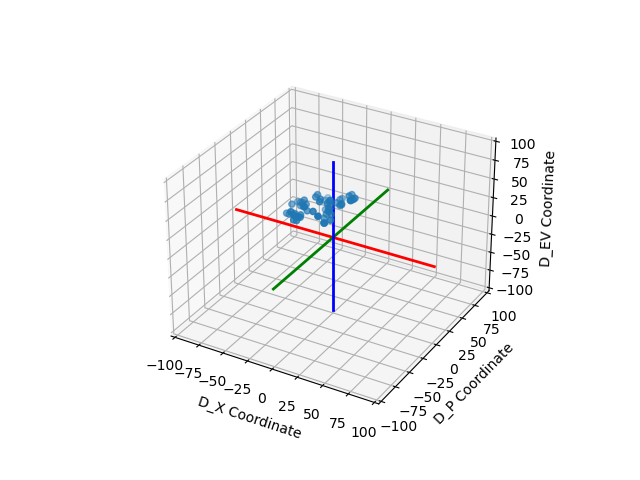

In [6]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot with x, y, and z coordinates
ax.scatter(d_x, d_p, d_ev)

# Label the axes
ax.set_xlabel('D_X Coordinate')
ax.set_ylabel('D_P Coordinate')
ax.set_zlabel('D_EV Coordinate')

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

ax.plot([xlim[0], xlim[1]], [0, 0], [0, 0], color='r', linewidth=2, label='D_X-axis')

# Draw the y-axis
ax.plot([0, 0], [ylim[0], ylim[1]], [0, 0], color='g', linewidth=2, label='D_P-axis')

# Draw the z-axis
ax.plot([0, 0], [0, 0], [zlim[0], zlim[1]], color='b', linewidth=2, label='D_EV-axis')

# Display the plot
plt.show()

<IPython.core.display.Javascript object>


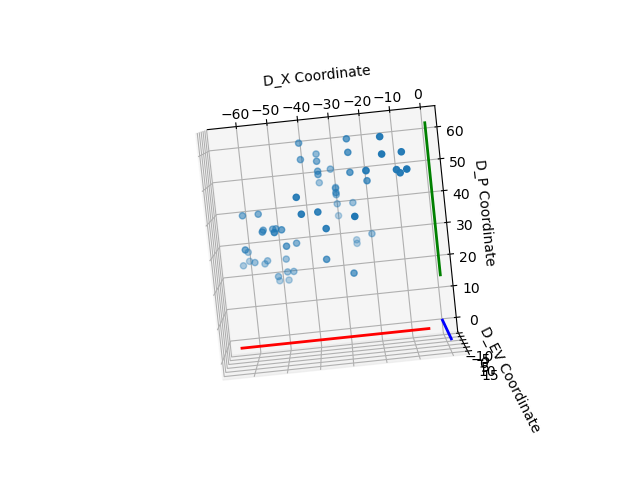

In [7]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot with x, y, and z coordinates
ax.scatter(d_x, d_p, d_ev)

# Label the axes
ax.set_xlabel('D_X Coordinate')
ax.set_ylabel('D_P Coordinate')
ax.set_zlabel('D_EV Coordinate')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()


ax.plot([xlim[0], xlim[1]], [0, 0], [0, 0], color='r', linewidth=2, label='D_X-axis')

# Draw the y-axis
ax.plot([0, 0], [ylim[0], ylim[1]], [0, 0], color='g', linewidth=2, label='D_P-axis')

# Draw the z-axis
ax.plot([0, 0], [0, 0], [zlim[0], zlim[1]], color='b', linewidth=2, label='D_EV-axis')


# Display the plot
plt.show()

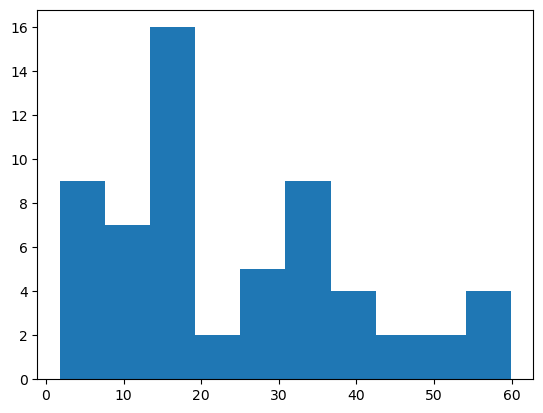

In [5]:
plt.hist(abs_sum_d)
plt.show()

In [13]:
import numpy as np
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('../../../../data_pezzulo.mat')

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'None', '__function_workspace__'])


In [12]:

# Access specific variables
averse_data = data['averse']
neutral_data = data['neutral']
seeking_data = data['seeking']

# Print to understand the structure
print("averse0 data:", averse_data)
print("neutral0 data:", neutral_data)
print("seeking0 data:", seeking_data)


averse0 data: [[ 1  2  3  4  7  9 10 11 14 15 16 17 18 19 20 21 22 24 25 26 27 28 40]]
neutral0 data: [[ 5  8 12 29 30 32 33 34 36 37 38]]
seeking0 data: [[ 6 13 23 31 35 39]]


In [9]:
import numpy as np
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('../../../../Lee_et_al_2023_data.mat')

# Accessing variables from the loaded data (assuming they exist)
averse = data['averse0']
neutral = data['neutral0']
seeking = data['seeking0']

# Extract subject IDs and process the data
subs = np.unique(data['data']['ID'][0, 0])
nSubs = len(subs)
nSubsAll = nSubs

# Initialize lists for each subject
pS, xS, evS, pR, xR, evR, ch, rt, safe, risk, conflict, md = ([] for i in range(12))

for s in range(nSubs):
    sub_id = subs[s][0]  # Assuming the IDs are stored in a structured array
    pS.append(data['data']['pSafe'][0, 0][data['data']['ID'][0, 0] == sub_id])
    xS.append(data['data']['xSafe'][0, 0][data['data']['ID'][0, 0] == sub_id] / 100)
    evS.append(pS[-1] * xS[-1])
    pR.append(data['data']['pRisk'][0, 0][data['data']['ID'][0, 0] == sub_id])
    xR.append(data['data']['xRisk'][0, 0][data['data']['ID'][0, 0] == sub_id] / 100)
    evR.append(pR[-1] * xR[-1])
    ch.append(data['data']['Ch'][0, 0][data['data']['ID'][0, 0] == sub_id])
    rt_data = data['data']['RT'][0, 0][data['data']['ID'][0, 0] == sub_id] / 1000
    rt.append(rt_data)
    # Remove outliers in reaction times
    rt_log = np.log(rt_data)
    rt_median = np.median(rt_log)
    rt_mad = np.median(np.abs(rt_log - rt_median))
    rt[-1][(rt_log > rt_median + 3 * rt_mad) | (rt_log < rt_median - 3 * rt_mad)] = np.nan
    safe.append(data['data']['magSafe'][0, 0][data['data']['ID'][0, 0] == sub_id])
    risk.append(data['data']['magRisk'][0, 0][data['data']['ID'][0, 0] == sub_id])
    conflict.append(data['data']['conflict'][0, 0][data['data']['ID'][0, 0] == sub_id])
    md.append(data['data']['MDr'][0, 0][data['data']['ID'][0, 0] == sub_id])

    # Calculate differences and sums
    dV = evR[-1] - evS[-1]
    V = evR[-1] + evS[-1]
    dP = pR[-1] - pS[-1]
    P = pR[-1] + pS[-1]
    dX = xR[-1] - xS[-1]
    X = xR[-1] + xS[-1]

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


KeyError: 'data'